# Identificando e Removendo Outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [2]:
dados= pd.read_csv("C:/Users/JOHGNATAN/OneDrive/Área de Trabalho/Python_Data_Science/base_de_dados_diversos/aluguel.csv", sep = ';')


<AxesSubplot:>

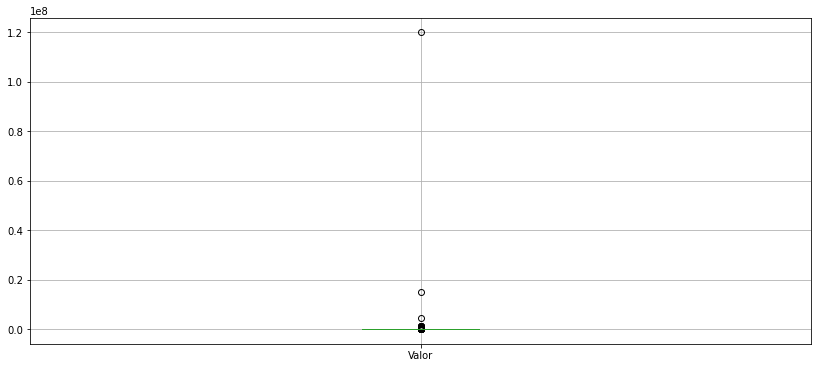

In [3]:
dados.boxplot(['Valor'])

In [4]:
valor = dados['Valor']
valor

0        1700.0
1        7000.0
2        5200.0
3         800.0
4         800.0
          ...  
32955     800.0
32956    1800.0
32957    1400.0
32958    3000.0
32959    6500.0
Name: Valor, Length: 32960, dtype: float64

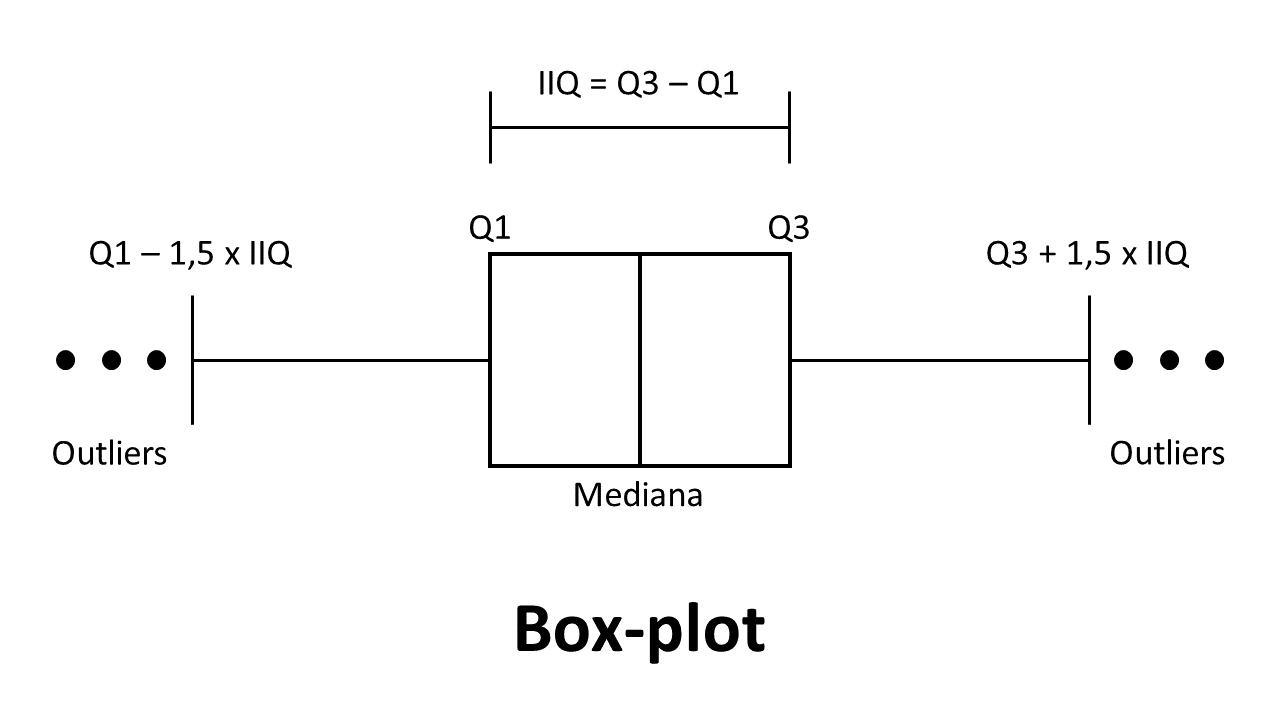

In [7]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)

IIQ = Q3 - Q1

limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ


In [8]:
#CRIANDO UM DATAFRAME REMOVENDO OS OUTLIERS

selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]


<AxesSubplot:>

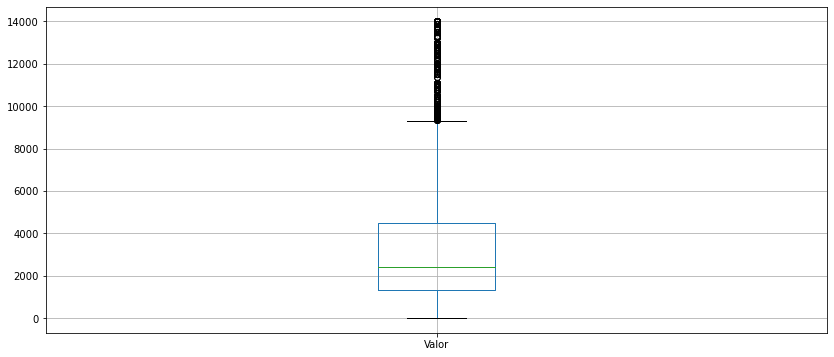

In [9]:
dados_new.boxplot(['Valor'])

### Histograma antes da remoção dos dados divergentes 

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

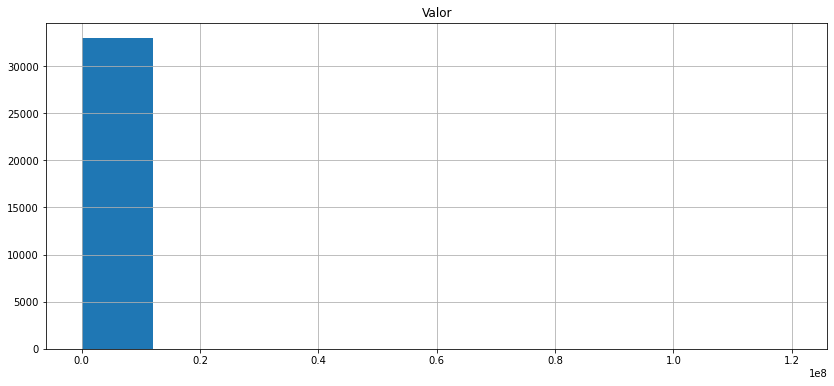

In [14]:
dados.hist(['Valor'])



###  Depois da remoção dos dados divergentes, teremos uma distribuição de barras de forma organizada

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

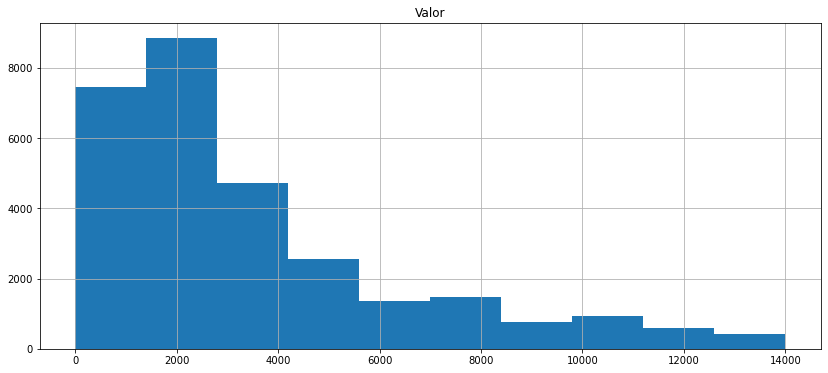

In [15]:
dados_new.hist(['Valor'])

# Identificando e Removendo Outliers por Grupo

In [17]:
dados= pd.read_csv('C:/Users/JOHGNATAN/OneDrive/Área de Trabalho/Python_Data_Science/base_de_dados_diversos/aluguel_amostra.csv', sep = ';')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9995,Apartamento,Copacabana,3,1,2,160,15500.0,1600.0,435.0,96.88,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

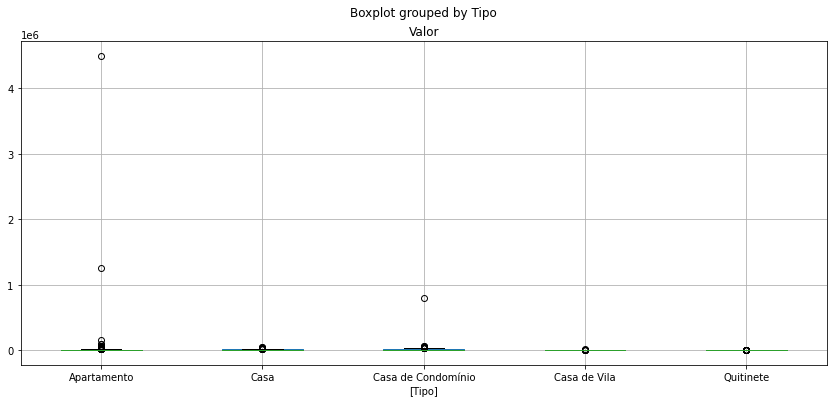

In [18]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [19]:
grupo_tipo = dados.groupby('Tipo')['Valor']
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [20]:
grupo_tipo.groups

{'Apartamento': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 51, 52, 55, 56, 58, 59, 60, 61, 62, 63, 64, 66, 68, 70, 73, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 116, 119, 120, 121, ...], 'Casa': [13, 31, 50, 54, 74, 109, 115, 123, 127, 172, 181, 202, 210, 236, 247, 261, 291, 307, 360, 385, 478, 512, 541, 550, 557, 601, 611, 624, 631, 633, 637, 641, 642, 692, 702, 787, 793, 796, 812, 813, 843, 858, 869, 880, 884, 894, 931, 942, 943, 962, 1001, 1014, 1097, 1141, 1155, 1190, 1192, 1278, 1286, 1307, 1325, 1338, 1340, 1371, 1459, 1510, 1538, 1542, 1668, 1675, 1719, 1735, 1741, 1769, 1783, 1800, 1878, 1897, 1926, 1929, 1951, 1960, 1972, 1976, 2035, 2096, 2112, 2117, 2122, 2213, 2240, 2253, 2267, 2292, 2329, 2332, 2373, 2405, 2459, 2486, ...], 'Casa de 

In [21]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)

IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ


In [23]:
dados_new = pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    
    selecao = eh_tipo & eh_dentro_limite
    
    dados_select = dados[selecao]
    
    dados_new = pd.concat([dados_new, dados_select])
    

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

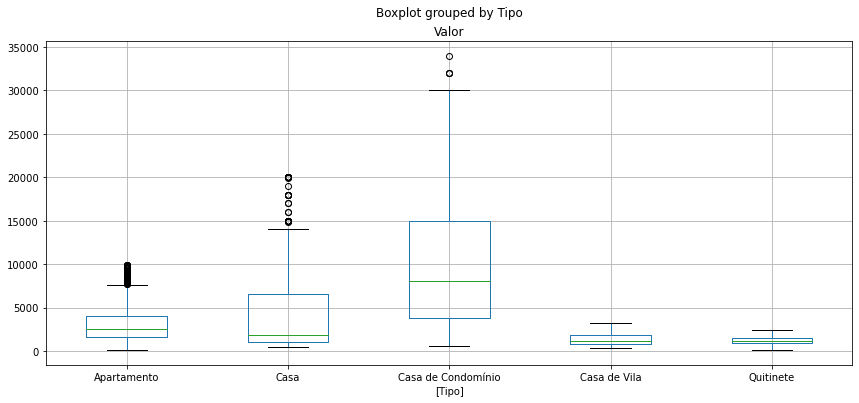

In [24]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

# Mais sobre Gráficos

In [27]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15,8))

In [28]:
dados = pd.read_csv("C:/Users/JOHGNATAN/OneDrive/Área de Trabalho/Python_Data_Science/base_de_dados_diversos/extras/aluguel.csv", sep = ';')

dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


In [29]:
area = plt.figure()

<Figure size 1080x576 with 0 Axes>

In [30]:
g1 = area.add_subplot(2,2,1)
g2 = area.add_subplot(2,2,2)
g3 = area.add_subplot(2,2,3)
g4 = area.add_subplot(2,2,4)


In [31]:
g1.scatter(dados['Valor'], dados.Area)
g1.set_title('Valor X Área')


g2.hist(dados.Valor)
g2.set_title('Histograma')


dados_g3 = dados.Valor.sample(100)
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title('Amostra de valores')

grupo = dados.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values

g4.bar(label, valores)
g4.set_title('Valor médio por Tipo')

Text(0.5, 1.0, 'Valor médio por Tipo')

###  Ao executarmos nosso código teremos quatro tipos diferentes de gráficos na mesma área, sendo o primeiro um gráfico de dispersão, o segundo um histograma, o terceiro uma amostra da variável Valor, e por fim o tradicional gráfico em barras que representa o valor médio por tipos de imóvel.

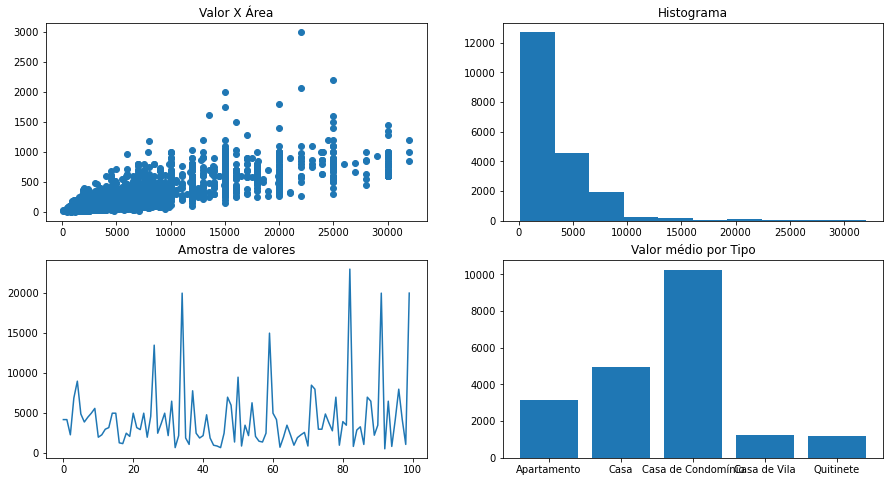

In [32]:
area

In [ ]:
#SALVANDO FIGURA

area.savefig('grafico.png', dpi = 300, bbox_inches = 'tight')
